# Welcome to Jupyter!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 60000 + 1) instead
  


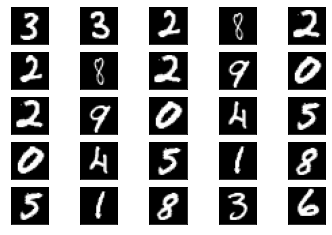

In [4]:
side = 5
start = np.random.random_integers(low=0, high=x_train.shape[0], size=(1,))[0]
fig, ax = plt.subplots(side, side)
for a in range(side):
    for b in range(side):
        ax[a, b].axes.xaxis.set_visible(False)
        ax[a, b].axes.yaxis.set_visible(False)
        ax[a, b].imshow(x_train[2 * a + b + start, :, :], cmap='gray')
plt.show()



In [5]:
x_train_norm = x_train/ 255
x_test_norm = x_test / 255


In [6]:
model = tf.keras.Sequential([
    #Camada de entrada
    tf.keras.layers.Flatten(input_shape=(28, 28)), #Função flatten transforma a imagem 28 x 28 em uma unica só (1x1)
    #Camada oculta                                               
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #Camada de saida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [7]:
model.compile(loss= 'sparse_categorical_crossentropy',
             optimizer = 'adam', #segundo a internet o 'adam' é um bom otimizador
             metrics=['accuracy'])




In [8]:
model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2606 - accuracy: 0.9253 - val_loss: 0.1405 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1154 - accuracy: 0.9663 - val_loss: 0.1044 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0805 - accuracy: 0.9749 - val_loss: 0.0866 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0743 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0755 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0722 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0823 - val_accuracy:

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 16.3318 - accuracy: 0.9781


[16.3317928314209, 0.9781000018119812]

In [10]:
predictions = model.predict(x_test)
np.set_printoptions(suppress=True)
print(y_test[0])     #É o numero de test
print(predictions[0])#Se o numero de deste corresponder entre 0 e 9
                     #terá 1 (verdadeiro) e 0 (falso).


7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook